In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.read_csv("~/Documents/tnp_trip_99.csv", header=None)

In [19]:
df.shape

(3714113, 21)

In [34]:
df.columns.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [35]:
df = pd.read_csv("~/Documents/tnp_trip_99.csv", header=0)

In [22]:
df.columns.tolist()

['8239b39e39139d2b6d3c7b73291a802e0698db09',
 '02/15/2025 10:30:00 PM',
 '02/15/2025 11:00:00 PM',
 '1807',
 '10.9',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 '49',
 '37.5',
 '0',
 '1.23',
 '38.73',
 'false',
 '1',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 '41.7065878819',
 '-87.6233665115',
 'POINT (-87.6233665115 41.7065878819)']

In [23]:
df = pd.read_csv("~/Documents/tnp_trip_99.csv", header=None)

In [24]:
df.columns = [
    "trip_id", "trip_start_timestamp", "trip_end_timestamp", "trip_seconds",
    "trip_miles", "pickup_community_area", "dropoff_community_area", "fare",
    "tip", "additional_charges", "trip_total", "shared_trip_authorized",
    "trips_pooled", "pickup_centroid_latitude", "pickup_centroid_longitude",
    "pickup_centroid_location", "dropoff_centroid_latitude", "dropoff_centroid_longitude",
    "dropoff_centroid_location", "col_20", "col_21"  
]

In [25]:
df['trip_start_timestamp'] = pd.to_datetime(df['trip_start_timestamp'], errors='coerce')
df = df.dropna(subset=['trip_start_timestamp'])

In [26]:
df['date'] = df['trip_start_timestamp'].dt.date
df['weekday'] = df['trip_start_timestamp'].dt.day_name()

In [27]:
daily_counts = df.groupby(['date', 'weekday']).size().reset_index(name='ride_count')

In [28]:
avg_by_weekday = daily_counts.groupby('weekday')['ride_count'].mean().reset_index()

In [29]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_weekday['weekday'] = pd.Categorical(avg_by_weekday['weekday'], categories=weekday_order, ordered=True)
avg_by_weekday = avg_by_weekday.sort_values('weekday')

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

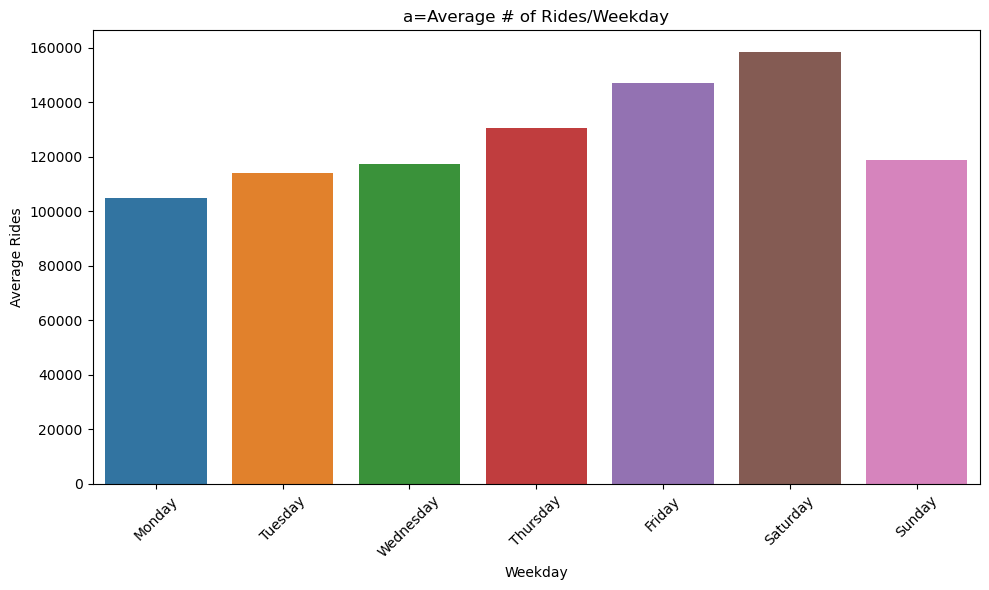

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_by_weekday, x='weekday', y='ride_count')
plt.title("a=Average # of Rides/Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Rides")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()